In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
pd.set_option('display.max_columns', 130)


In [124]:
data_org=pd.read_csv('loan.csv',low_memory=False)
data=data_org
print(data.shape)

(39717, 111)


In [125]:
#We have one class label loan_status
data.loan_status.value_counts()
#We have 3 distinct status of loan,let us convert it in numbers and then we can drop this column
#We can make Current status as our test set data
#let us replace the datasets
#data['loan_status']=data.loan_status.replace({'Fully Paid' : 1,
#                           'Charged Off' : 0,
#                           'Current':2})

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [126]:
#WE had 111 columns in our original dataset
#From the data - we had 44 columns which had all data null
#We remove those columns straight away from our data 
#Now shape is redued to 39717 rows and 57 columns

data.drop(data.columns[data.isnull().sum()==data.shape[0]],axis=1,inplace=True)
data.shape

(39717, 57)

In [127]:
#let us check which columns are left after the removal of all null colummns
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [128]:
#Check distinct number of entries in our left over dataset
data.apply(pd.Series.nunique)

#Here we can see that id, member_id, url are having all distinct values 
#id and memberid are uniqur ids , for our analysis we dont need them
#we can see that url is also having all different values - also it indicates loan certificate so we dont need it


id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28821
emp_length                       12
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26528
purpose                          14
title                         19616
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [129]:

#let us remove all this three columns

data.drop(['id','member_id','url'],axis=1,inplace=True)
data.shape

(39717, 54)

In [130]:
#Let us focus on columns which have same data  across whole data set.
data.columns[data.apply(pd.Series.nunique)==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [131]:
#remove all those columns which have same data 
data.drop(data.columns[data.apply(pd.Series.nunique)==1],axis=1,inplace=True)
data.shape
#Now we are left with 45 columns 

(39717, 45)

In [132]:
#We can see that desc column is filled by borrower, and description regarindg loan is given in it
#This column is not required for our analysis
#We will remove it form data
data.desc.head(10)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
5                                                  NaN
6      Borrower added on 12/18/11 > I am planning o...
7      Borrower added on 12/16/11 > Downpayment for...
8      Borrower added on 12/21/11 > I own a small h...
9      Borrower added on 12/16/11 > I'm trying to b...
Name: desc, dtype: object

In [133]:
data.drop('desc',axis=1,inplace=True)
data.shape
#now we have 44 columns for our analysis

(39717, 44)

In [134]:
#let us check purpose and title
#by looking at the description of purpose and title in metadata
#First we will check what is the difference between two of them

print(data[['title','purpose']].head(10)) 
#purpose seems to have definite data - from group of 14 categories
#title is same as purpose- only difference is that it is entered by user
#So we can remove title from our data

                                   title             purpose
0                               Computer         credit_card
1                                   bike                 car
2                   real estate business      small_business
3                               personel               other
4                               Personal               other
5  My wedding loan I promise to pay back             wedding
6                                   Loan  debt_consolidation
7                        Car Downpayment                 car
8   Expand Business & Buy Debt Portfolio      small_business
9            Building my credit history.               other


In [135]:
data.drop('title',inplace=True,axis=1)
data.shape
#We have now 42 columns

(39717, 43)

In [136]:
# We have some features here which will be added once the loan get funded.
# Those features won't going to help in making decesion to approve loan or reject loan.
# We won't have those features when new loan application come.
# so we will remove all those variables.

remove_col_1= ['next_pymnt_d','out_prncp_inv']
data.drop(remove_col_1,inplace=True,axis=1)
data.shape

(39717, 41)

In [137]:

print(data[['loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt','total_pymnt_inv']].head())
#total_amount_inv and funded_amount_inv are related to what investors will get and what they will invest respecively.
#As we are looking at the total amount funded to borrower irrespective of who provided it and how much he/she provided it
#We will removw funded-inv and total_inv 

data.drop(['funded_amnt_inv','total_pymnt_inv'],inplace=True,axis=1)
data.shape

#Now we have 40 columns

   loan_amnt  funded_amnt  funded_amnt_inv   total_pymnt  total_pymnt_inv
0       5000         5000           4975.0   5863.155187          5833.84
1       2500         2500           2500.0   1008.710000          1008.71
2       2400         2400           2400.0   3005.666844          3005.67
3      10000        10000          10000.0  12231.890000         12231.89
4       3000         3000           3000.0   3513.330000          3513.33


(39717, 39)

In [138]:
#In data set column emp_title has vague data, filled up by borrower and mostt values are null
#as per below analysis
emp_title_count = Counter(list(data['emp_title']))
emp_title_count.most_common(15)

[(nan, 2458),
 ('US Army', 134),
 ('Bank of America', 109),
 ('IBM', 66),
 ('AT&T', 59),
 ('Kaiser Permanente', 56),
 ('USAF', 54),
 ('Wells Fargo', 54),
 ('UPS', 53),
 ('US Air Force', 52),
 ('Walmart', 45),
 ('Lockheed Martin', 44),
 ('United States Air Force', 42),
 ('State of California', 42),
 ('U.S. Army', 41)]

In [139]:
#We will drop emp_title column
data.drop('emp_title',axis=1,inplace=True)
data.shape

(39717, 38)

In [140]:
data[['loan_amnt','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee']].head(5)
#By looking at the data we can see that, total_payment= total_rec_principal+total_rec_interest+total_late fees
#As we already have interest % in data 
#We dont need explicit distinction of all these columns
#We will remove total_rec_prncp, total_rec_int, total_rec_late_fee


,loan_amnt,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee
0,5000,5863.155187,5000.00,863.16,0.00
1,2500,1008.710000,456.46,435.17,0.00
2,2400,3005.666844,2400.00,605.67,0.00
3,10000,12231.890000,10000.00,2214.92,16.97
4,3000,3513.330000,2475.94,1037.39,0.00


In [141]:
data.drop(['total_rec_int','total_rec_prncp','total_rec_late_fee'],axis=1,inplace=True)
data.shape

(39717, 35)

In [142]:
data.isnull().sum()

loan_amnt                      0
funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
total_pymnt                    0
recoveries                     0
collection

In [143]:
#We do not need last payment amount and last payment date, as we already have total payment done 
#against the loan amount.also these are future reference columns.
data.drop(['last_pymnt_amnt','last_pymnt_d'],inplace=True,axis=1)
data.shape

(39717, 33)

In [144]:
pd.crosstab(index=data['zip_code'],columns=data['loan_status'])

loan_status,Charged Off,Current,Fully Paid
zip_code,,,
007xx,0,0,1
010xx,14,2,84
011xx,1,0,13
012xx,1,1,12
013xx,3,1,10
014xx,7,1,25
015xx,10,1,51
016xx,1,1,22
017xx,5,0,74


In [145]:
# funded_amnt — this data only we get after loan approved/rejected
# sub_grade — redundant information (we can use grade column)
# int_rate — decide from grade column
# issued_d - this is useful after loan get funded
# zip_code - we have state code so we can use that and also zipcode has many unique values which seems not so much useful
# out_prncp - this data only we get after loan  funded
# total_pymnt-this data only we get after loan  funded
# recoveries- this data only we get after loan  funded
# collection_recovery_fee-this data only we get after loan funded
remove_col_2=['funded_amnt','sub_grade','issue_d','zip_code','out_prncp', 'total_pymnt', 'recoveries', 'collection_recovery_fee']	

In [146]:
data.drop(remove_col_2,inplace=True,axis=1)
data.shape

(39717, 25)

In [147]:
null_data = data.isnull().sum()
null_data

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
last_credit_pull_d            2
pub_rec_bankruptcies        697
dtype: int64

In [148]:
print(data.dtypes)
#we have '%' sign in two columns(revol_util,int_rate) which are not needed we can convert them in to numeric columns
data['revol_util'] = data['revol_util'].str.rstrip('%').astype('float')
data['int_rate'] = data['int_rate'].str.rstrip('%').astype('float')

loan_amnt                   int64
term                       object
int_rate                   object
installment               float64
grade                      object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
mths_since_last_record    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
total_acc                   int64
last_credit_pull_d         object
pub_rec_bankruptcies      float64
dtype: object


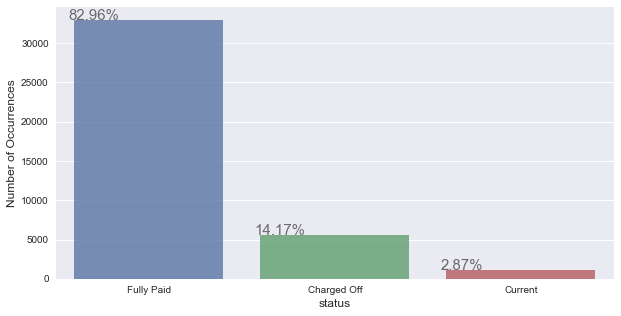

In [149]:
#lets do some analysis on each variable

loan_status_count=data['loan_status'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
d=sns.barplot(loan_status_count.index, loan_status_count.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('status', fontsize=12)

totals = []

# find the values and append to list
for i in d.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in d.patches:
    d.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

here we can see that data is imablanced.we have more data of fully paid loan.

In [150]:
#lets see relations between home_ownership and loan status
loan_home_table = pd.crosstab(index=data["home_ownership"], 
                          columns=data["loan_status"]).sort_values('Fully Paid', ascending=True)

loan_home_table

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
NONE,0,0,3
OTHER,18,0,80
OWN,443,83,2532
MORTGAGE,2327,638,14694
RENT,2839,419,15641


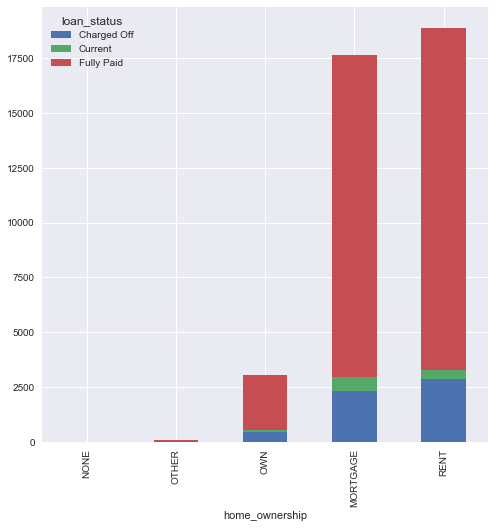

In [151]:
loan_home_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

We can observe one thing here those people who owns home chances of charged off is less so we can have this one feature on which we can consider in list of  predict variable

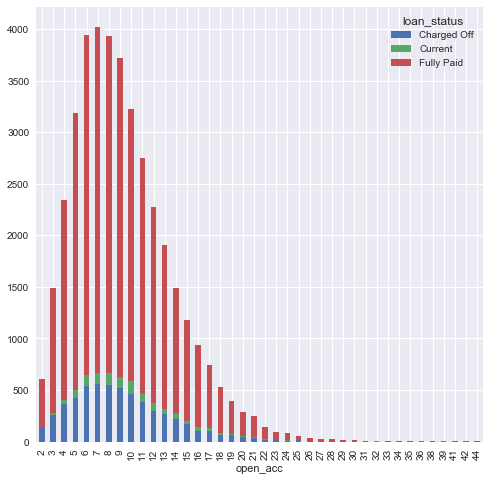

In [152]:
account_table = pd.crosstab(index=data["open_acc"], 
                          columns=data["loan_status"])

account_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

We can say that minimum number of 2 accounts needed to get loan approved.no of accounts 3 to 5 have more fully loan paid and less charged off.again after 8 charged off chances becoming less but we are not able to conclude exactly anything from this.

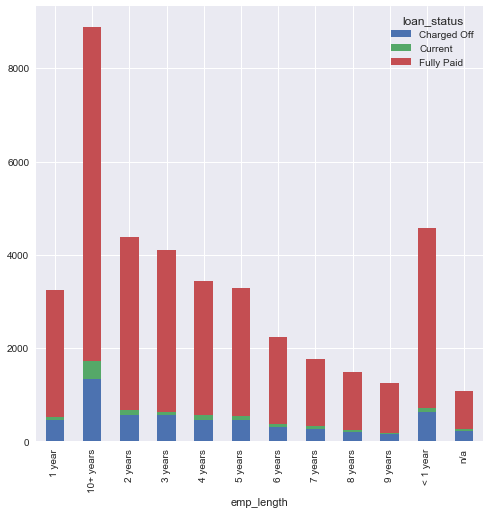

In [153]:
#lets analyse if emp_length is more then charged off less?

emp_table = pd.crosstab(index=data["emp_length"], 
                          columns=data["loan_status"])

emp_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


from the chart we can say that less than 3 year(2 year ,1 year,less than 1 year or n/a(may be some business persons) has more charged off applications.
we can also include this variable to predict varible list.

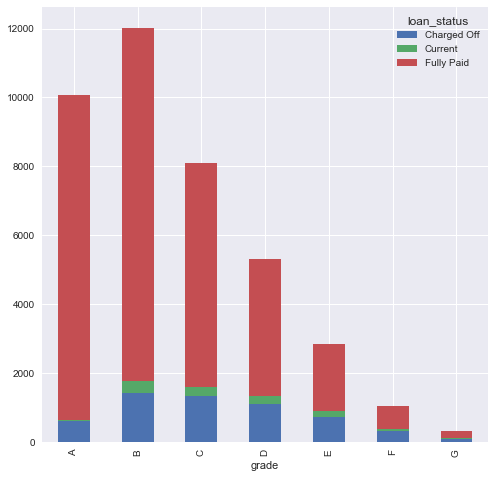

In [154]:
grade_table = pd.crosstab(index=data["grade"], 
                          columns=data["loan_status"])

grade_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

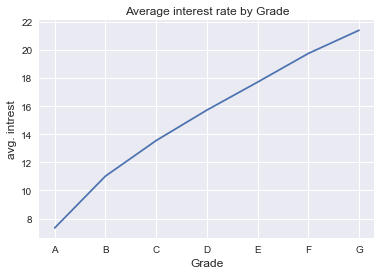

In [155]:

p=data.groupby(['grade'])['int_rate'].mean()
sns.set_style("darkgrid")
plt.ylabel('avg. intrest', fontsize=12)
plt.xlabel('Grade', fontsize=12)
plt.title("Average interest rate by Grade")
plt.plot(p)
plt.show()

As the grade increases,chances of risk are high which we can even see from above chart also.so for higher grade interest rate is also high.here Compare to A grade other increasing grades has more charged off transactions.

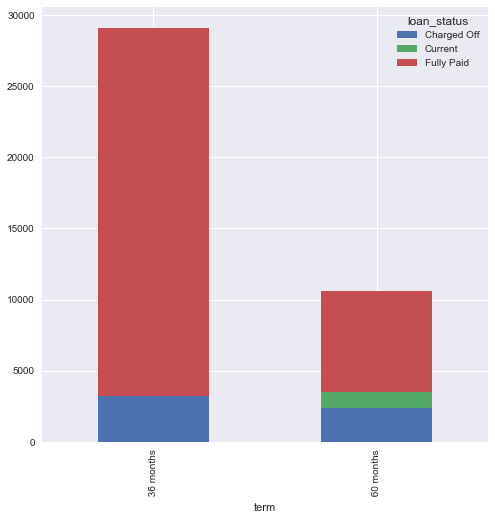

In [156]:
term_table = pd.crosstab(index=data["term"], 
                          columns=data["loan_status"])

term_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

We are not getting much information from above plot both are almost equal charged off
but we can say that there is no on going loan in 36 months term

In [157]:
#convert categoris in numbers
data['term']=data.term.apply(lambda c:c.replace('months',''))
data['term']=data['term'].apply(pd.to_numeric)

#replace in grade as well
data['grade']=data['grade'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
#We have 3 distinct status of loan,let us convert it in numbers and then we can drop this column
#We can make Current status as our test set data
#let us replace the datasets
data['loan_status']=data.loan_status.replace({'Fully Paid' : 1,
                          'Charged Off' : 0,
                          'Current':2})

In [158]:
#Process emp_lenth - make it numerics
data['emp_length']=data.emp_length.replace({'10+ years' : 10,
                          '< 1 year' : 1, 'n/a':0})
data['emp_length']=data.term.apply(lambda c:str(c).replace('yeas',''))
data['emp_length']=data.term.apply(lambda c:str(c).replace('year',''))
data['emp_length']=data['emp_length'].apply(pd.to_numeric)

#With the help of label encoder, let us make home ownership and purpose
#and verification code numerics
from sklearn.preprocessing import LabelEncoder
categries= ['home_ownership', 'verification_status', 'purpose']
le = LabelEncoder()
for i in categries:
    data[i] = le.fit_transform(data[i]) 

In [159]:
list(data.columns[data.dtypes ==type(object)])
#we are left with 3 categorical colums

['addr_state', 'earliest_cr_line', 'last_credit_pull_d']

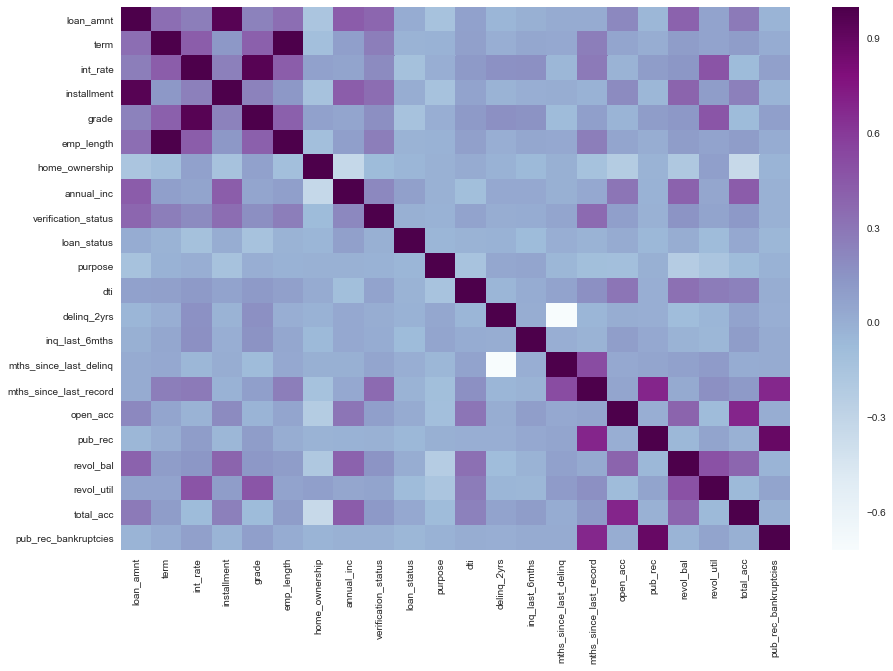

In [160]:
plt.figure(figsize=(15,10)) 
sns.heatmap(data=data.corr(method="spearman"),cmap="BuPu")

#From above covarice heat map
#We can conclude that

    1)Installment and Grade are very much related to loan_amount
    2)term of loan is related to emp_lenth
    3)home ownership does not seem to have much correlation
    4)annual income is related to loan amount
    5)intrest rate is related to grade
    6)installment is related to loan amount and annual income
    7)verification status and loan-amount is related
    8)dti and revol_util is related.
    9)mnths_since_last_delinq and mths_since_last_record is strongly related.
    10)mnths_since_last_delinq and public_record is strongly related.
    11)open_acc and total_acc are corelated.
    12)revol_bal and revol util are related.
    13)pub_rec_bankcruptices is very much related to public record and mnths_since_lasr_record.

